# London Bike Sharing -- EDA and Visualization-- 

## **About Data**

using Kaggle london-bike-sharing-dataset


In order to reduce traffic congestion and air pollution in London, the government encourages people to use shared bicycles. This demand for shared bicycles is influenced by several factors. Factors such as air temperature, humidity, wind, whether it is a holiday or weekend and the season are all important. We can use this information to get some conclusions about people's habits,etc when it comes to bike sharing. 


**Dataset Schema** 

**Timestamp:** timestamp indicating the date and time of each observation.<br>
**cnt (count):** the count of new bike shares recorded for each timestamp.<br>
**t1:** real temperature in Celsius at the time of observation.<br>
**t2:** perceived temperature in Celsius, known as Real Feel Temperature<br>
**Hum (humudity):**  humidity level expressed as a percentage.<br>
**windspeed:** Self Explanatory.<br>
**weather_code:** The categories according to this chart:

* **1 -** Clear or mostly clear with possible haze, fog, or patches of fog
* **2 -** Scattered clouds or few clouds
* **3 -** Broken clouds
* **4 -** Cloudy
* **7 -** Rain, light rain shower, or light rain
* **10 -** Rain with thunderstorm 
* **26 -** Snowfall.

**is _holiday:** The observation is a holiday (1) or a non-holiday (0).<br>
**is_weekend:** The observation falls on a weekend (1) or a non-weekend day (0).<br>
**season:** Categories of the column:

    **0 -** Spring, 
    **1 -** Summer, 
    **2 -** Fall, 
    **3 -** Winter.



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## a) Let's check the structure of the dataframe

In [3]:
df.shape

(17414, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


** CONCLUSION 1: 10 columns, 'weather_code','is_holiday', 'is_weekend', 'season' are float type, it is adviseable to replace their codified values with friendly legends, so later on results of calculations are more readable, for example in col 'is_weekend' we should see Weekend or Not Weekend value instead of 1's and 0's.

** CONCLUSION 2: 'timestamp' column is an object, ie. a string. Given the nature of the value we should change it to date object in case we need to do some time series calculations or extracting the values of day of week o day number

In [5]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [6]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

**there are no Null values in the dataframe

## b) Time to implement some changes on the columns we mentioned before. Note the "inplace" parameter set True so that the changes take place in the dataset

In [7]:
# Season
df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

#--------------------------------------------------

#Is Holiday
df['is_holiday'].replace(1, 'Holiday', inplace=True)
df['is_holiday'].replace(0, 'Non-holiday', inplace=True)

#--------------------------------------------------------

# Is weekend
df['is_weekend'].replace(1, 'Weekend', inplace=True)
df['is_weekend'].replace(0, 'Non-weekend', inplace=True)

#------------------------------------------------------------

#Weather Codes
df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain', inplace=True)
df['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)
df['weather_code'].replace(94, 'Freezing Fog', inplace=True)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non-holiday,Weekend,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non-holiday,Weekend,Winter


**Now we add a new column 'Date' based on  'timestamp' but with datetime type**

In [8]:
df['date'] = pd.to_datetime(df['timestamp']) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  object        
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  object        
 8   is_weekend    17414 non-null  object        
 9   season        17414 non-null  object        
 10  date          17414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:

df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,day,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015-01-04 00:00:00,Sunday,January
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 01:00:00,Sunday,January


## b) Distribution of share count per day of week, month, weather, season and holiday

### We can estimate the amount of bike renting per day, by grouping the rows

In [18]:
#we can estimate the number of renting per day of week and transform that figure in million, for the sake of simplicity,it returns
# a groupbyobject which is a series object, the first column is the index the other column the values
monthly_bike_share  = (df.groupby('day')['cnt'].sum()/1000000).round(1)
monthly_bike_share

day
Friday       2.9
Monday       2.8
Saturday     2.5
Sunday       2.4
Thursday     3.1
Tuesday      3.1
Wednesday    3.1
Name: cnt, dtype: float64

In [15]:
# Day

daily_bike_share  = (df.groupby('day')['cnt'].sum()/1000000).round(1)
daily_bike_share

day
Friday       2.9
Monday       2.8
Saturday     2.5
Sunday       2.4
Thursday     3.1
Tuesday      3.1
Wednesday    3.1
Name: cnt, dtype: float64

**Observation: On Thursday, Tuesday and Wednesday we have 3.1 million renting per day**

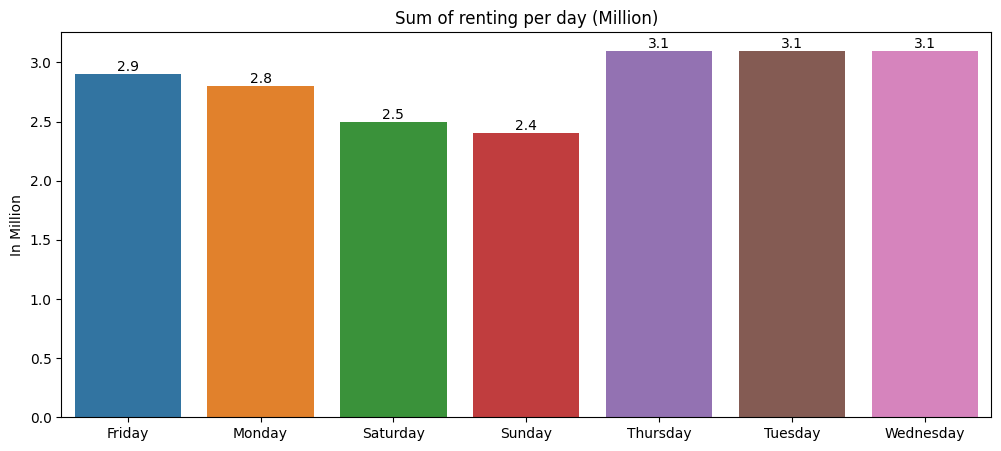

In [16]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=daily_bike_share.index, y=daily_bike_share.values, errorbar=None)
ax.set_title("Sum of renting per day (Million)")
ax.set_xlabel('') # To cancel writing "day" on the x-axis 
ax.set_ylabel('In Million')
for i in ax.containers:
    ax.bar_label(i)

### We can estimate the amount of share counts per month, and express the figure in million

In [17]:
# Month

monthly_bike_share  = (df.groupby('month')['cnt'].sum()/1000000).round(1)
monthly_bike_share

month
April        1.6
August       2.2
December     1.3
February     1.1
January      1.2
July         2.3
June         2.0
March        1.4
May          1.9
November     1.4
October      1.8
September    1.9
Name: cnt, dtype: float64

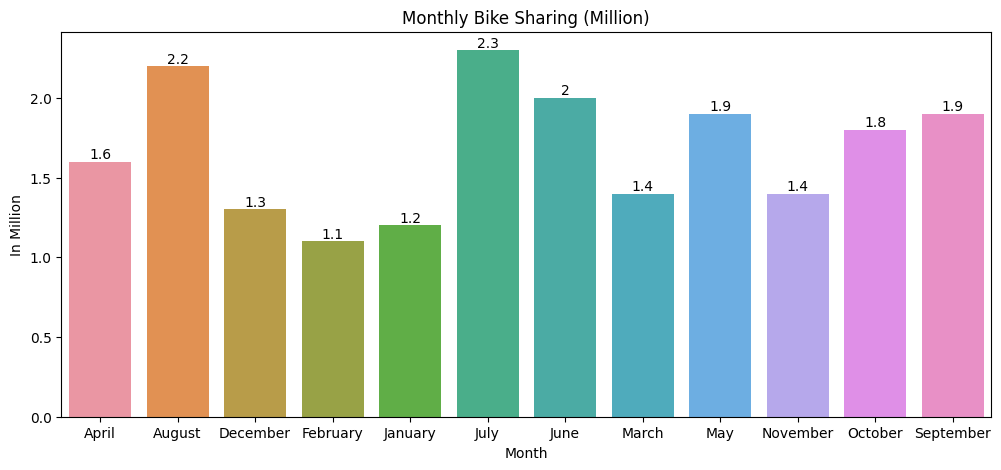

In [13]:
# Month

plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Monthly Bike Sharing (Million)")
ax.set_xlabel('Month')  
ax.set_ylabel('In Million')
for i in ax.containers:
    ax.bar_label(i)

### Distribution per  season

In [18]:
#Season 

seasonally_bike_share  = (df.groupby('season')['cnt'].sum()/1000000).round(1)
seasonally_bike_share

season
Fall      5.1
Spring    4.9
Summer    6.4
Winter    3.6
Name: cnt, dtype: float64

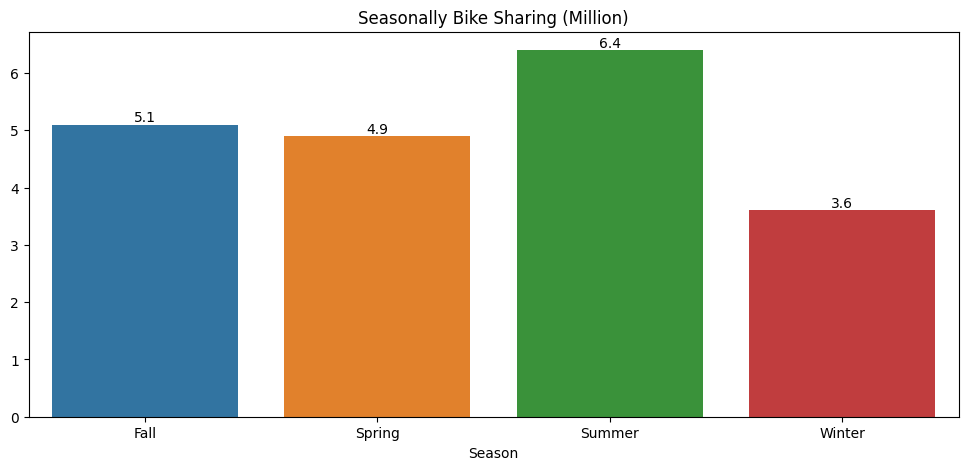

In [19]:
#Season 

plt.figure(figsize=(12,5))

ax=sns.barplot(x=seasonally_bike_share.index, y=seasonally_bike_share.values, errorbar=None)
ax.set_title("Seasonally Bike Sharing (Million)")
ax.set_xlabel('Season')  

for i in ax.containers:
    ax.bar_label(i)

### Distribution per weather condition

In [20]:
# Weather 

weather_bike_share  = (df.groupby('weather_code')['cnt'].sum()/1000000).round(1)
weather_bike_share

weather_code
Broken clouds             4.2
Clear                     7.1
Cloudy                    0.9
Rain                      1.5
rain with thunderstorm    0.0
scattered clouds          6.0
snowfall                  0.0
Name: cnt, dtype: float64

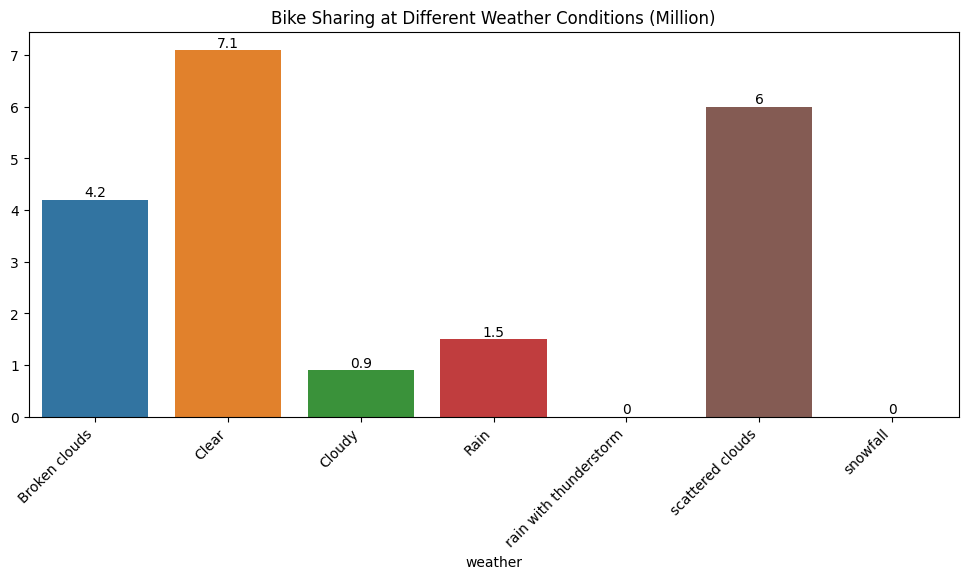

In [21]:
plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Different Weather Conditions (Million)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('weather')  

for i in ax.containers:
    ax.bar_label(i)

### Distribution per  Holiday value

In [22]:
# Holiday 

weather_bike_share  = (df.groupby("is_holiday")['cnt'].sum()/1000000).round(1)
weather_bike_share

is_holiday
Holiday         0.3
Non-holiday    19.6
Name: cnt, dtype: float64

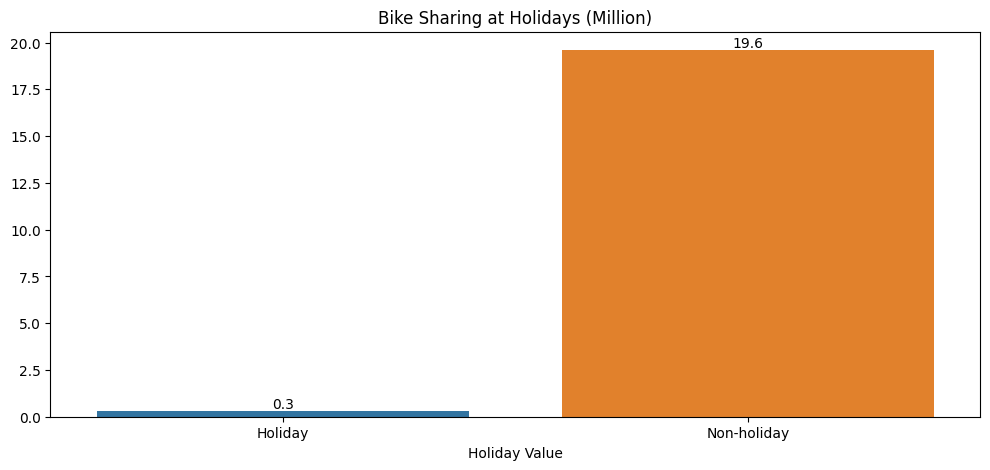

In [23]:
# Holiday 

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Holidays (Million)")
ax.set_xlabel('Holiday Value')  

for i in ax.containers:
    ax.bar_label(i)

### Distribution per  weekends/weekdays

In [24]:
# Weekend 

weekend_bike_share  = (df.groupby('is_weekend')['cnt'].sum()/1000000).round(1)
weekend_bike_share

is_weekend
Non-weekend    15.0
Weekend         4.9
Name: cnt, dtype: float64

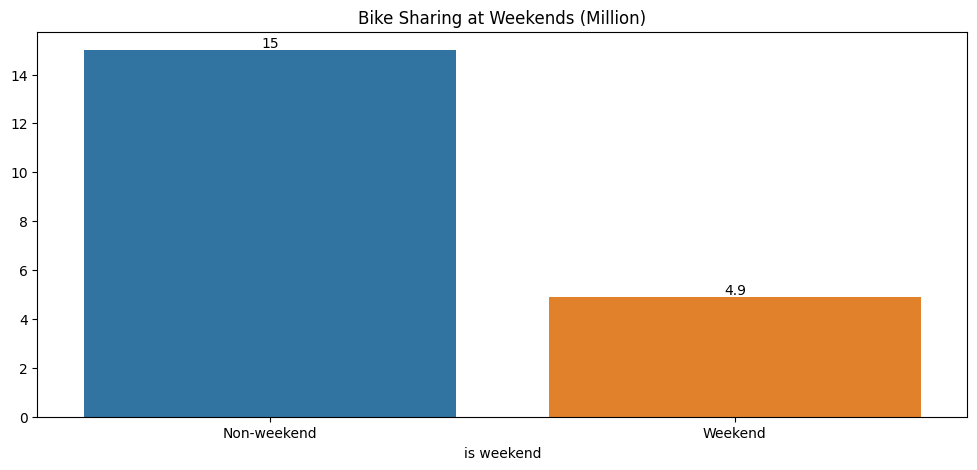

In [25]:
# Weekend

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weekend_bike_share.index, y=weekend_bike_share.values, errorbar=None)
ax.set_title("Bike Sharing at Weekends (Million)")
ax.set_xlabel('is weekend')  

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing high on non-week days.

## WAY for drawing figures

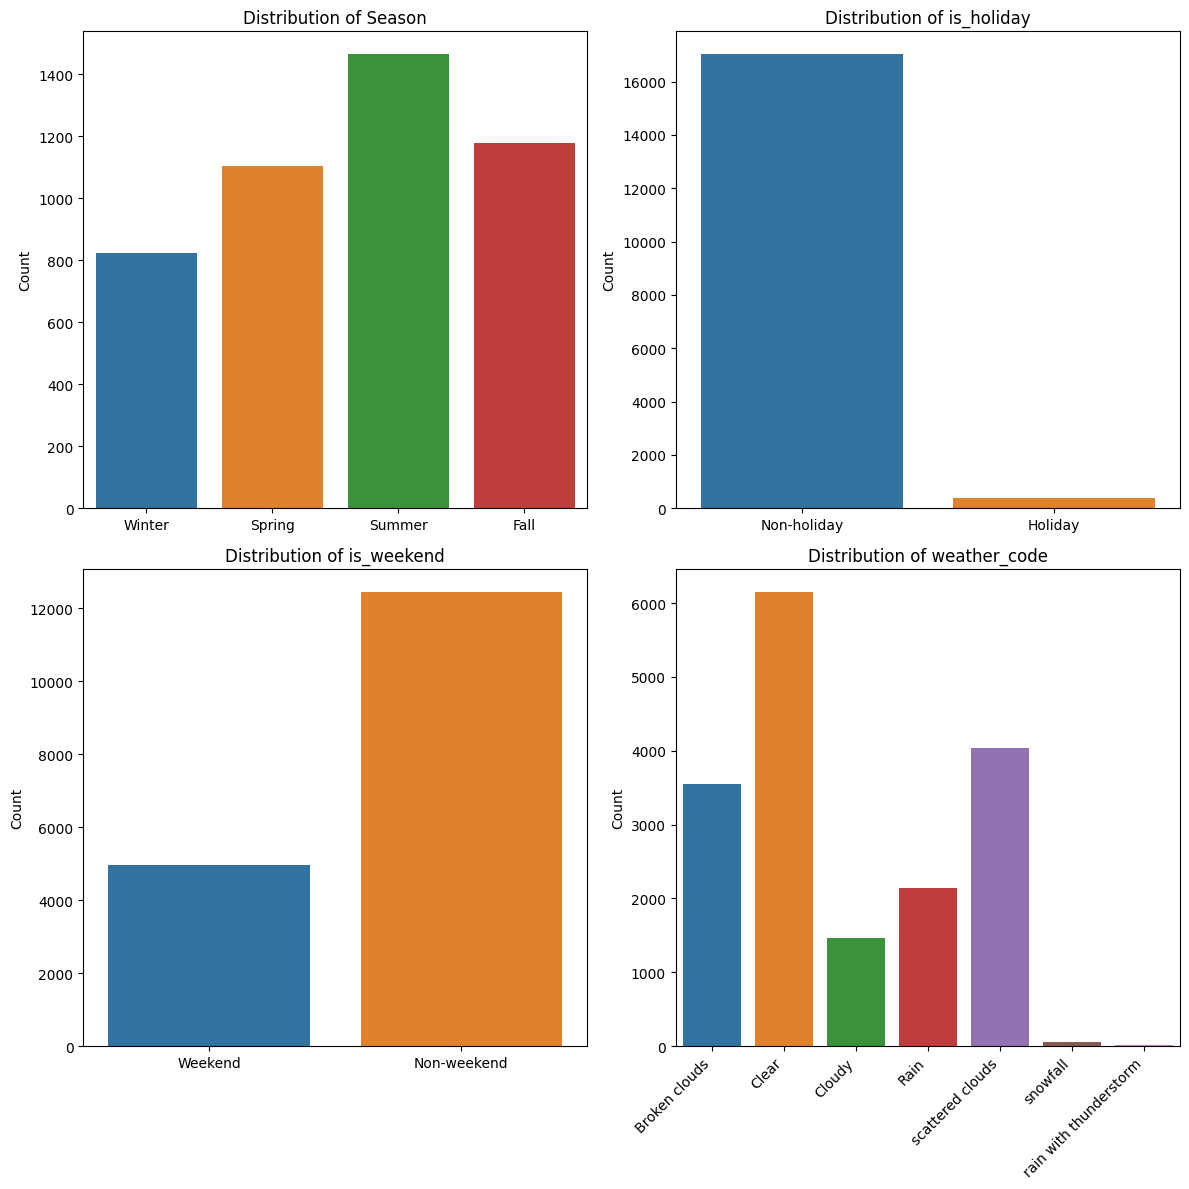

In [26]:
# 2. Way:

fig, ax = plt.subplots(2,2, figsize=(12, 12))


#ax=sns.barplot(data=df, x="season", y="cnt", errorbar=None)

# first plot by season
sns.barplot(data=df, x="season", y="cnt", ax = ax[0][0], errorbar=None)
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Count')
ax[0][0].set_title('Distribution of Season')
ax[0][0].set_xlabel('')

# second plot by holiday
sns.countplot(data=df, x="is_holiday", ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Count')
ax[0][1].set_title('Distribution of is_holiday')
ax[0][1].set_xlabel('')

# third plot by weekend
sns.countplot(data=df, x="is_weekend", ax=ax[1][0])
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Count')
ax[1][0].set_title('Distribution of is_weekend')
ax[1][0].set_xlabel('')

# fourth plot by weather code
sns.countplot(data=df, x="weather_code", ax=ax[1][1])
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Distribution of weather_code')
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')
ax[1][1].set_xlabel('')

fig.tight_layout()
plt.show()

**Insight:** People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.
* Demand for bicycle hire is higher on working days and on days with clear weather.

* Demand for bicycle hire is higher on working days and on days with clear weather.